# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;"> Task 25-> Logistic Regression from scratch</p>

# Logistic Regression
Logistic regression is a statistical method used for binary classification, which means it predicts one of two possible outcomes. It is widely used in various fields such as machine learning, medical research, and social sciences due to its simplicity and effectiveness. Unlike linear regression which predicts continuous values, logistic regression predicts the probability that a given input point belongs to a certain class.

### Model Representation
Once trained, the model takes the form of a logistic regression equation:

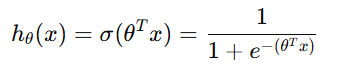

In this equation:
h(x) is the predicted probability of belonging to the default class.

In binary classification, we mark the default class with 1 and the other class with 0. y states the probability of an example belonging to the default class on a scale from 0 to 1.

- 1/(1+e^-z) is the sigmoid function.
- wo + w1x is the linear model within logistic regression.

## Linear Model
The linear model represents a linear relationship between the input features and the predicted output. The linear part of the entire model can be summarized with the equation:

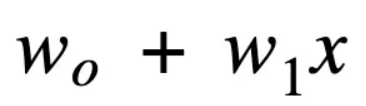

- x is the input variable. In statistics, x is referred to as an independent variable, while machine learning calls it a feature.
- w0 is the bias term.
- w1 is the weight for the input variable x.
- In machine learning, we call wi weights/parameters in general.

## Sigmoid Function
At the core of logistic regression is the logistic function, also known as the sigmoid function. It maps any real-valued number into the range (0, 1), which makes it suitable for binary classification tasks. The logistic function is defined as:

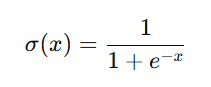

Here, 𝑒 is the base of the natural logarithm, and x is the input to the function, which is typically a linear combination of the input features.
#### Decision Boundary
A decision boundary is a threshold that we use to categorize the probabilities of logistic regression into discrete classes.
A decision boundary could take the form:
- y = 0 if predicted probability < 0.5
- y = 1 if predicted probability > 0.5

## Cost Function
The cost function J(Θ) is a formal representation of an objective that the algorithm is trying to achieve.
In the case of logistic regression, the cost function is called LogLoss (or Cross-Entropy) and the goal is to minimize the following cost function equation:

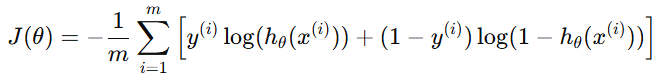

The cost function checks what the average error is between actual class membership and predicted class membership. The cost function not only penalizes big errors but also errors which are too confident (too close to 0 or 1). This guarantees that our predictions stay within the 0–1 range, exclusive.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### <b><span style='color:#ff6200'> Importing and preprocessing of data</span>

In [2]:
social = pd.read_csv("Social_Network_Ads.csv", usecols=lambda column: column != 'User ID')
social['Gender'] = social['Gender'].map({'Male': 0, 'Female': 1})
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [3]:
X = social[['Gender', 'Age', 'EstimatedSalary']]
y = social['Purchased']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 3), (80, 3), (320,), (80,))

### <b><span style='color:#ff6200'> Logistic Regression Implementation</span>

In [4]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
class LogisticRegression:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            cost = (-1 / n_samples) * np.sum(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
            if epoch % 10 == 0:
                print(f"Epoch: {epoch}, loss: {cost}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]

### <b><span style='color:#ff6200'> Applying model on data</span>

In [5]:
model = LogisticRegression(learning_rate=0.01, epochs=100)
model.fit(X_train, y_train)

Epoch: 0, loss: 0.6931471805599435
Epoch: 10, loss: 0.6808340998332172
Epoch: 20, loss: 0.6691645248174835
Epoch: 30, loss: 0.658103014255395
Epoch: 40, loss: 0.6476153777073326
Epoch: 50, loss: 0.637668795105062
Epoch: 60, loss: 0.6282318988726487
Epoch: 70, loss: 0.6192748235333352
Epoch: 80, loss: 0.6107692277048203
Epoch: 90, loss: 0.6026882931703501


In [6]:
y_pred_test = model.predict(X_test)
print("Predictions: ", y_pred_test)

Predictions:  [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]


In [7]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

accuracy_lr = accuracy(y_test, y_pred_test)
print(f' Accuracy: {accuracy_lr * 100:.2f}%')

 Accuracy: 86.25%
